In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Loading merged dataset
data_path = "/Users/yehana2002/Projects/DSGP/datasets/processed/merged_fuel_crude_prices.csv"
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Creating time based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['DayOfYear'] = df['Date'].dt.dayofyear

In [5]:
# Creating lag features
df['Petrol_Lag1'] = df['Petrol_Price'].shift(1)
df['Diesel_Lag1'] = df['Diesel_Price'].shift(1)
df['Crude_Lag1'] = df['Crude_Oil_Price'].shift(1)

In [6]:
# Moving Averages
df['Crude_MA7'] = df['Crude_Oil_Price'].rolling(window=7).mean()
df['Petrol_MA7'] = df['Petrol_Price'].rolling(window=7).mean()
df['Diesel_MA7'] = df['Diesel_Price'].rolling(window=7).mean()

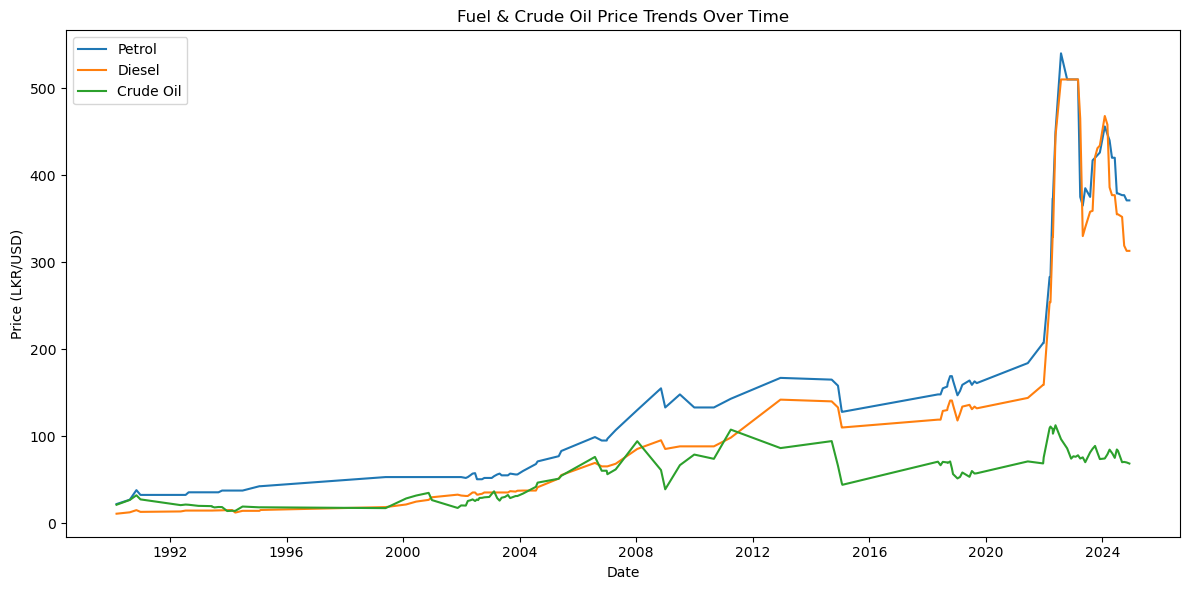

In [7]:
# EDA: Plot price trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Petrol_Price', label='Petrol')
sns.lineplot(data=df, x='Date', y='Diesel_Price', label='Diesel')
sns.lineplot(data=df, x='Date', y='Crude_Oil_Price', label='Crude Oil')
plt.title("Fuel & Crude Oil Price Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Price (LKR/USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df.isnull().sum()

Date               0
Petrol_Price       0
Diesel_Price       0
Crude_Oil_Price    0
Year               0
Month              0
Quarter            0
DayOfYear          0
Petrol_Lag1        1
Diesel_Lag1        1
Crude_Lag1         1
Crude_MA7          6
Petrol_MA7         6
Diesel_MA7         6
dtype: int64

In [9]:
df[df.isnull().any(axis=1)].head()

,Date,Petrol_Price,Diesel_Price,Crude_Oil_Price,Year,Month,Quarter,DayOfYear,Petrol_Lag1,Diesel_Lag1,Crude_Lag1,Crude_MA7,Petrol_MA7,Diesel_MA7
0,1990-03-01,22.0,10.9,21.19,1990,3,1,60,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-14,27.0,12.5,26.70,1990,8,3,226,22.0,10.9,21.19,NaN,NaN,NaN
2,1990-11-05,38.0,15.0,32.05,1990,11,4,309,27.0,12.5,26.70,NaN,NaN,NaN
3,1990-12-26,32.5,13.0,27.35,1990,12,4,360,38.0,15.0,32.05,NaN,NaN,NaN
4,1992-05-13,32.5,13.5,20.75,1992,5,2,134,32.5,13.0,27.35,NaN,NaN,NaN


In [13]:
# Dropping rows with any NaNs in lag/MA columns
df_final = df.dropna().reset_index(drop=True)

In [14]:
print(df_final.isnull().sum())

Date               0
Petrol_Price       0
Diesel_Price       0
Crude_Oil_Price    0
Year               0
Month              0
Quarter            0
DayOfYear          0
Petrol_Lag1        0
Diesel_Lag1        0
Crude_Lag1         0
Crude_MA7          0
Petrol_MA7         0
Diesel_MA7         0
dtype: int64


In [16]:
df_final.to_csv("/Users/yehana2002/Projects/DSGP/datasets/processed/final_model_ready_dataset.csv", index=False)

print("Final cleaned dataset is ready for modeling!")
print(f" Final shape: {df_final.shape}")

Final cleaned dataset is ready for modeling!
 Final shape: (112, 14)
